In [1]:
# tratamiento de los datos
# ============================================
import pandas as pd
import numpy as np

# librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

# Pair Programming Intro Machine Learning

Empezamos una nueva lección, y este es el momento de poner en práctica los conocimientos adquiridos sobre la Regresión Lineal Simple I. 

Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo. 

De forma que vamos a probar a realizar **ajustes lineales** con el fin de predecir alguna de sus **variables**. 
Este dataset será el que iremos usando a lo largo de todas las sesiones de pairprogramming de regresión lineal.

Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

# Objetivos

Los objetivos de hoy son:

- Buscar un conjunto de datos a analizar:

- Es necesario que el conjunto de datos a analizar tenga variables **numéricas** y **categóricas**, primando que haya más de una variable de tipo numérico.
- Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten **ligeramente limpios** para facilitar los análisis.
- Explicar los **datos** y las **variables** disponibles en el conjunto de datos seleccionado:
- Esto se hace para que **comprendais** mejor los datos con los que estais trabajando.
- Realizar un **EDA** sencillo para la variable **dependiente** y la variable **independiente**.

In [2]:
df = pd.read_csv("data/00-insurance.csv", index_col = 0).reset_index()
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


## Entender las variables que tenemos y como es nuetro dataframe. 

In [3]:
# número de filas y columnas del dataframe

print(f'El dataframe tiene {df.shape} filas y columnas')

El dataframe tiene (1338, 7) filas y columnas


In [4]:
# información general del dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# nombre de las columnas de nuestro dataframe

print (f'El nombre las columnas del df son {df.columns}')

El nombre las columnas del df son Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [6]:
# principales estadísticos de las columnas numéricas. recordemos que por defecto el describe nos devuelve las numéricas
print(f'Las principales estadisticas de las variables númericas son:')
df.describe().T

Las principales estadisticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
# principales estadisticos de las variables categóricas
print(f'Las principales estadisticas de las variables categóricas son:')
df.describe(include ="object").T

Las principales estadisticas de las variables categóricas son:


,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [8]:
# valores nulos en el dataframe
print(f'Los valores nulos del df son:')
df.isnull().sum()

Los valores nulos del df son:


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# duplicados 
print(f'Los valores duplicados del df son: {df.duplicated().sum()}')

Los valores duplicados del df son: 1


# Outliers

In [10]:
#Seleccionamos las columnas numericas de nuestro df, vemos que son 4 :
numericas = df.select_dtypes(include=[np.number])
numericas.head(2)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523


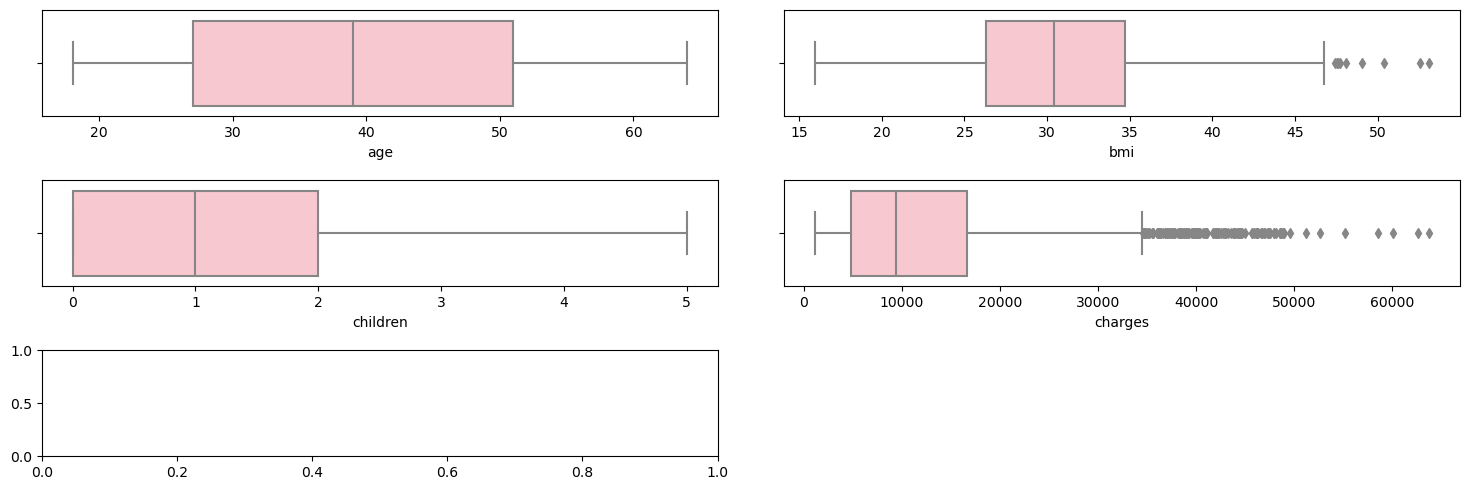

In [11]:
#Planteamos boxplot para poder ver los datos mejor de todas las variables númericas
fig, axes = plt.subplots(3,2, figsize=(15,5))# planteamos otro tamaño porque no se veia bien
axes = axes.flat
for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "pink"); 
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show();

Vemos que tenemos outliers en la columna BMI, planteamos la funcion para tratarlos:

In [12]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        # calculamos los límites
        outlier_step = 1.5 * IQR
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
    
    return dicc_indices 

In [13]:
lista_columnas = list(numericas.columns)#hacemos una lista con las columnas numericas para pasarsela a nuestra funcion.
ind = detectar_outliers(lista_columnas, df)

In [14]:
# en que columnas nos hemos encontrado con outliers? 
ind.keys()

dict_keys(['bmi', 'charges'])

Tal como veiamos visualmente, encontramos outliers en la columna de **bmi** y en la columna **charges**. 
- ¿ Qué hacemos con esto?

## Evaluar cuáles de las columnas tendremos que limpiar en nuestro *dataframe* y limpiarlas. 

Como hemos visto que los boxplot tienen muchos outlier, vemos las distribuciones para ver si tenemos que decidir el tratamiento.

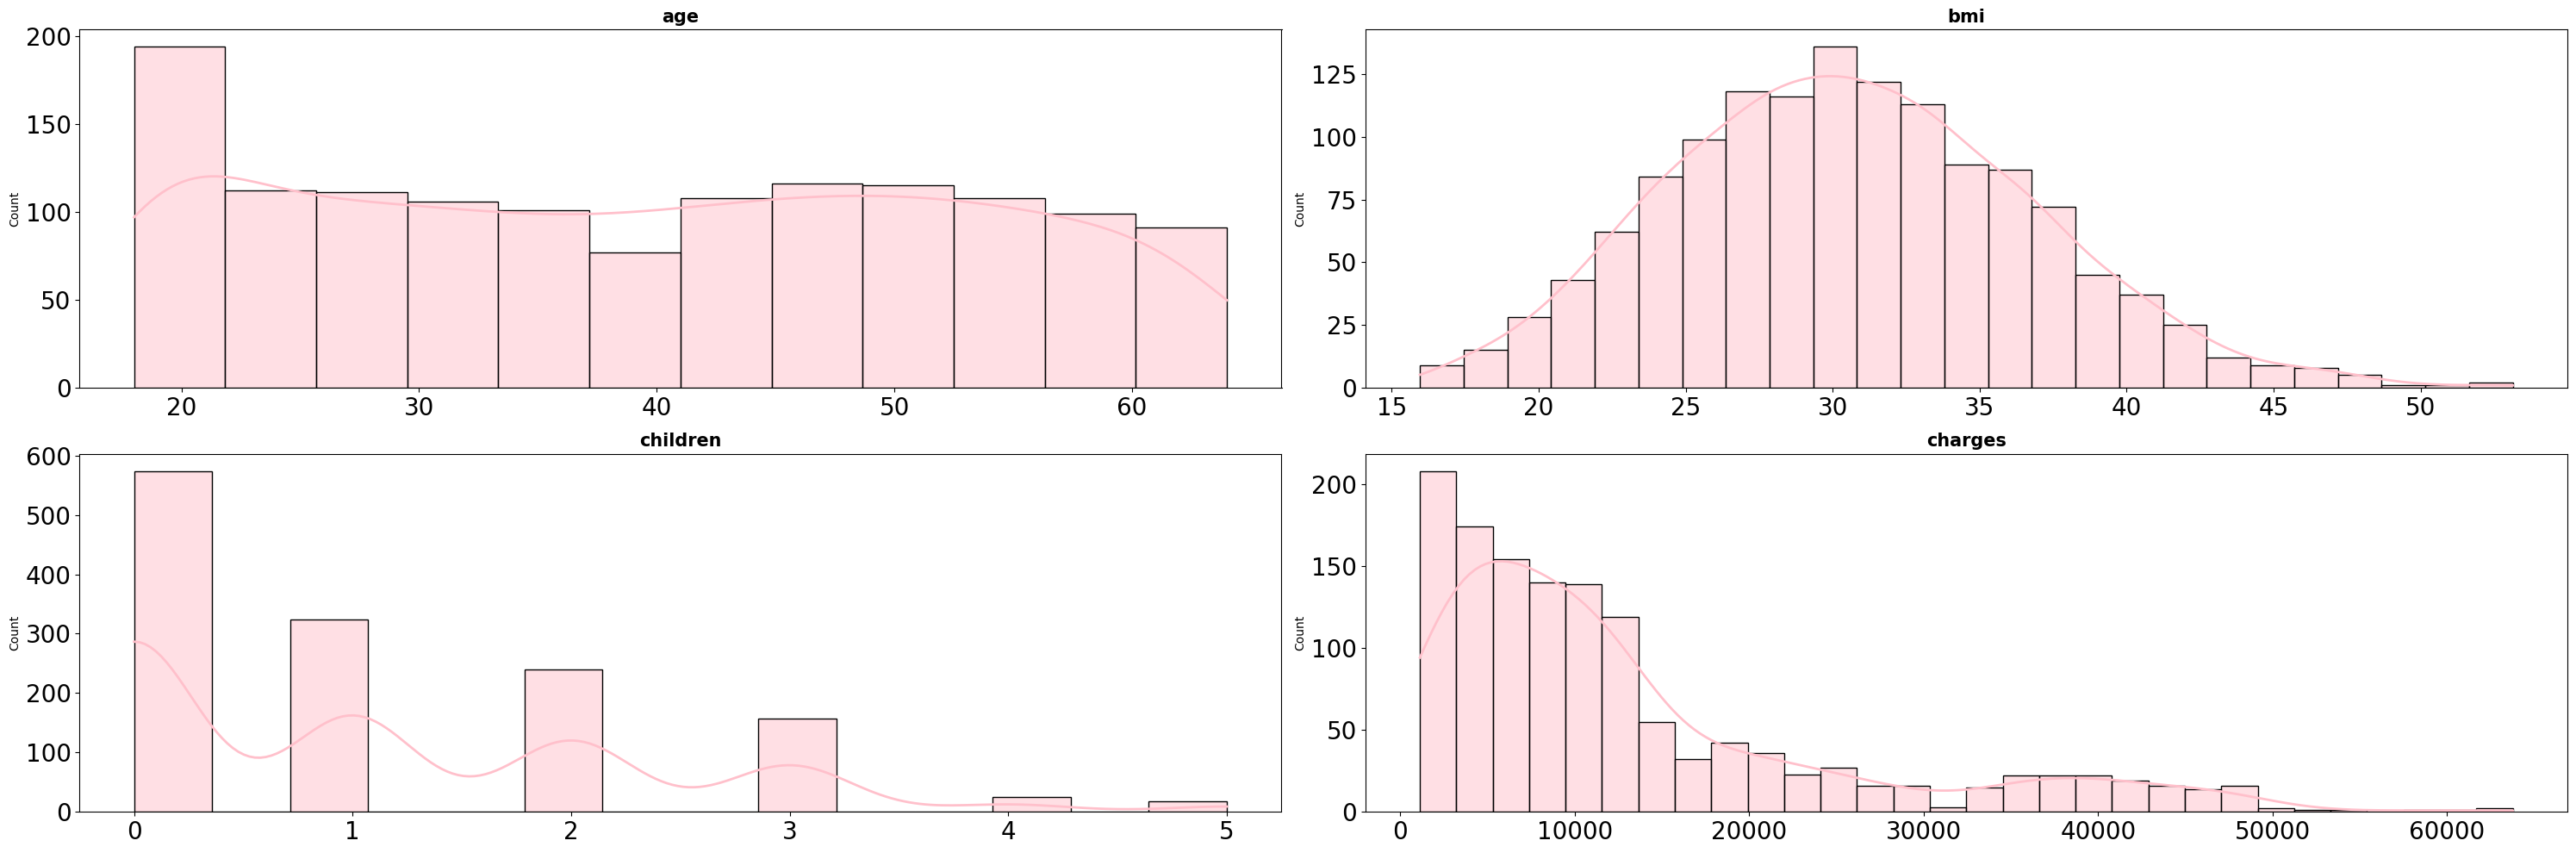

In [15]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))
axes = axes.flat#iterador
for i, colum in enumerate(numericas.columns): 
    sns.histplot(
        data = numericas[colum],
        kde = True,
        color = "pink", 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout();

Según las primas:

In [16]:
df4 = df[(df['charges']>=20000)]
df4.head(2)

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
9,60,female,25.840,0,no,northwest,28923.13692


In [17]:
numericas4=df4.select_dtypes(np.number)

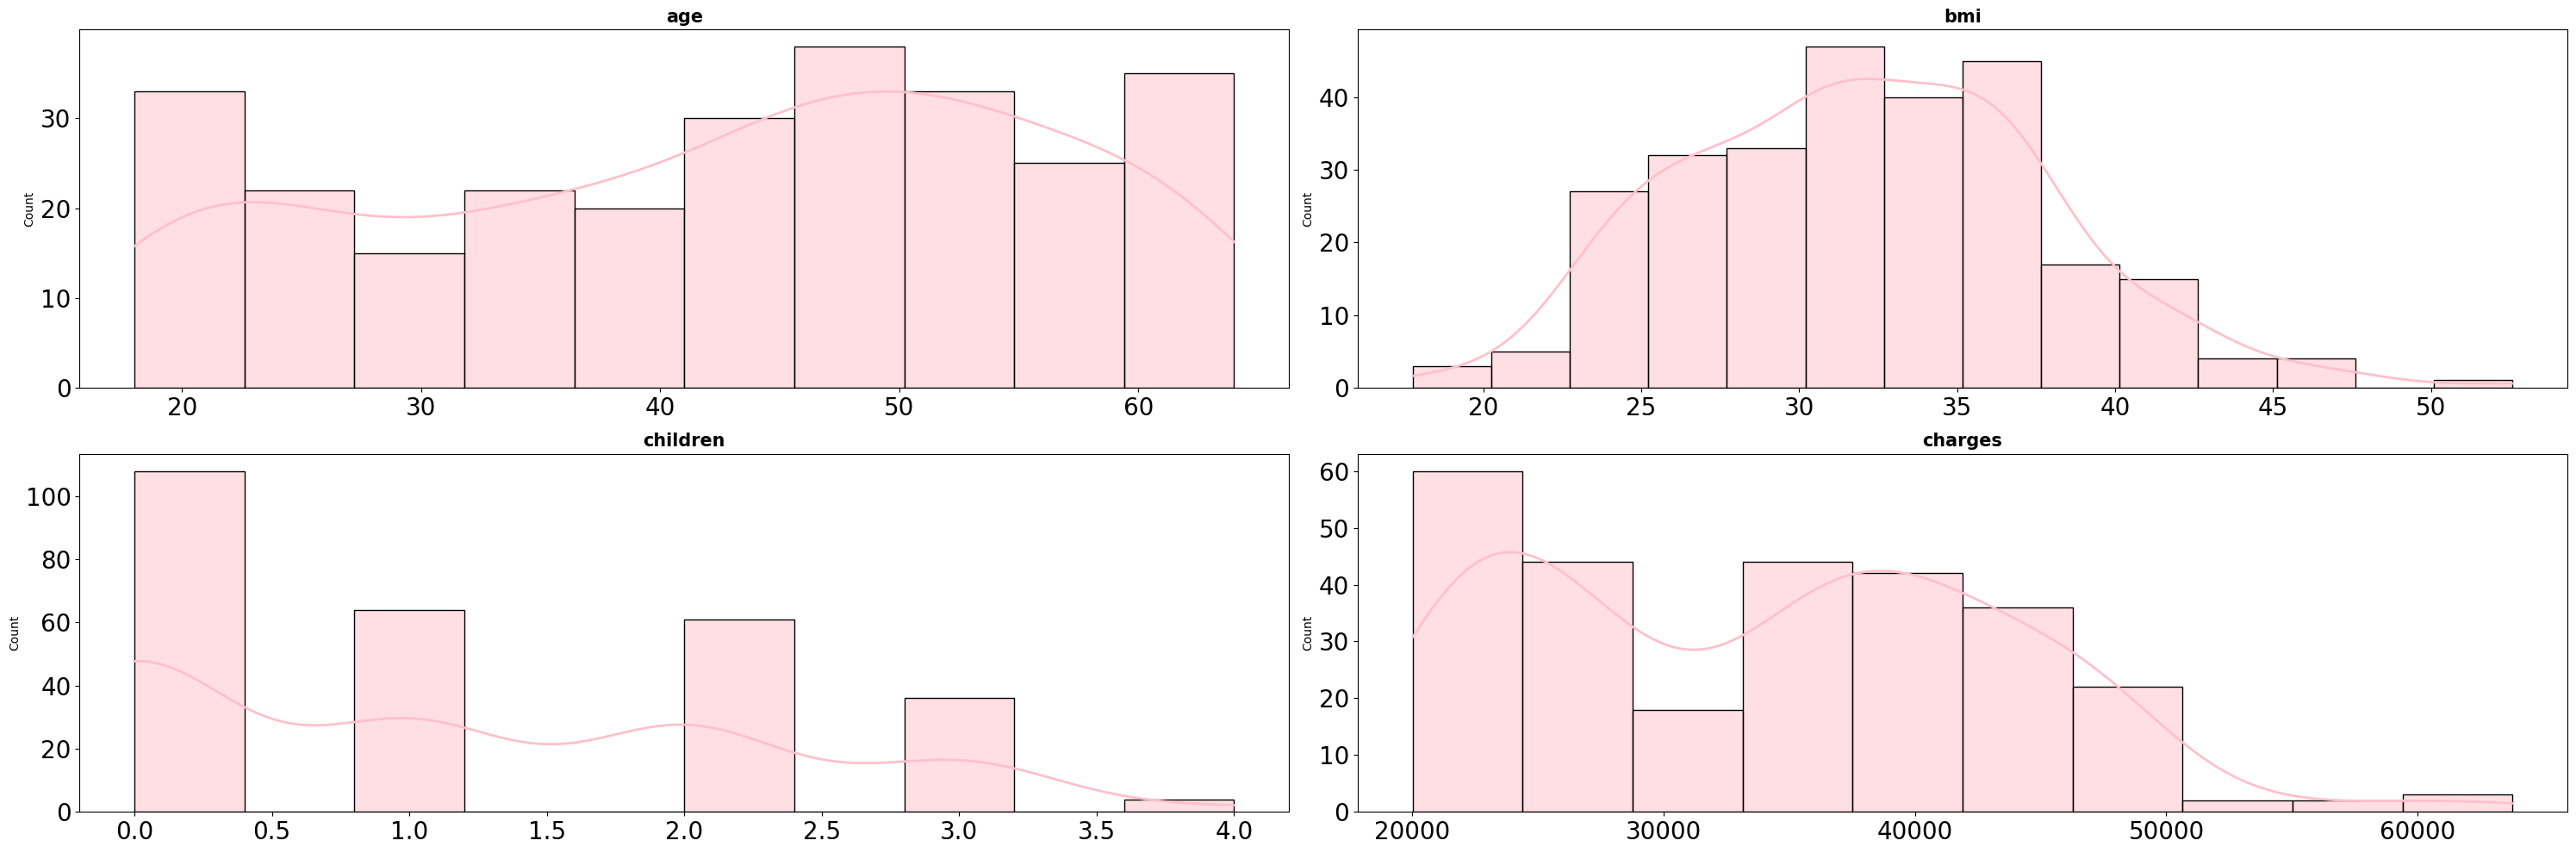

In [18]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))
axes = axes.flat#iterador
for i, colum in enumerate(numericas4.columns): 
    sns.histplot(
        data = numericas4[colum],
        kde = True,
        color = "pink", 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout();

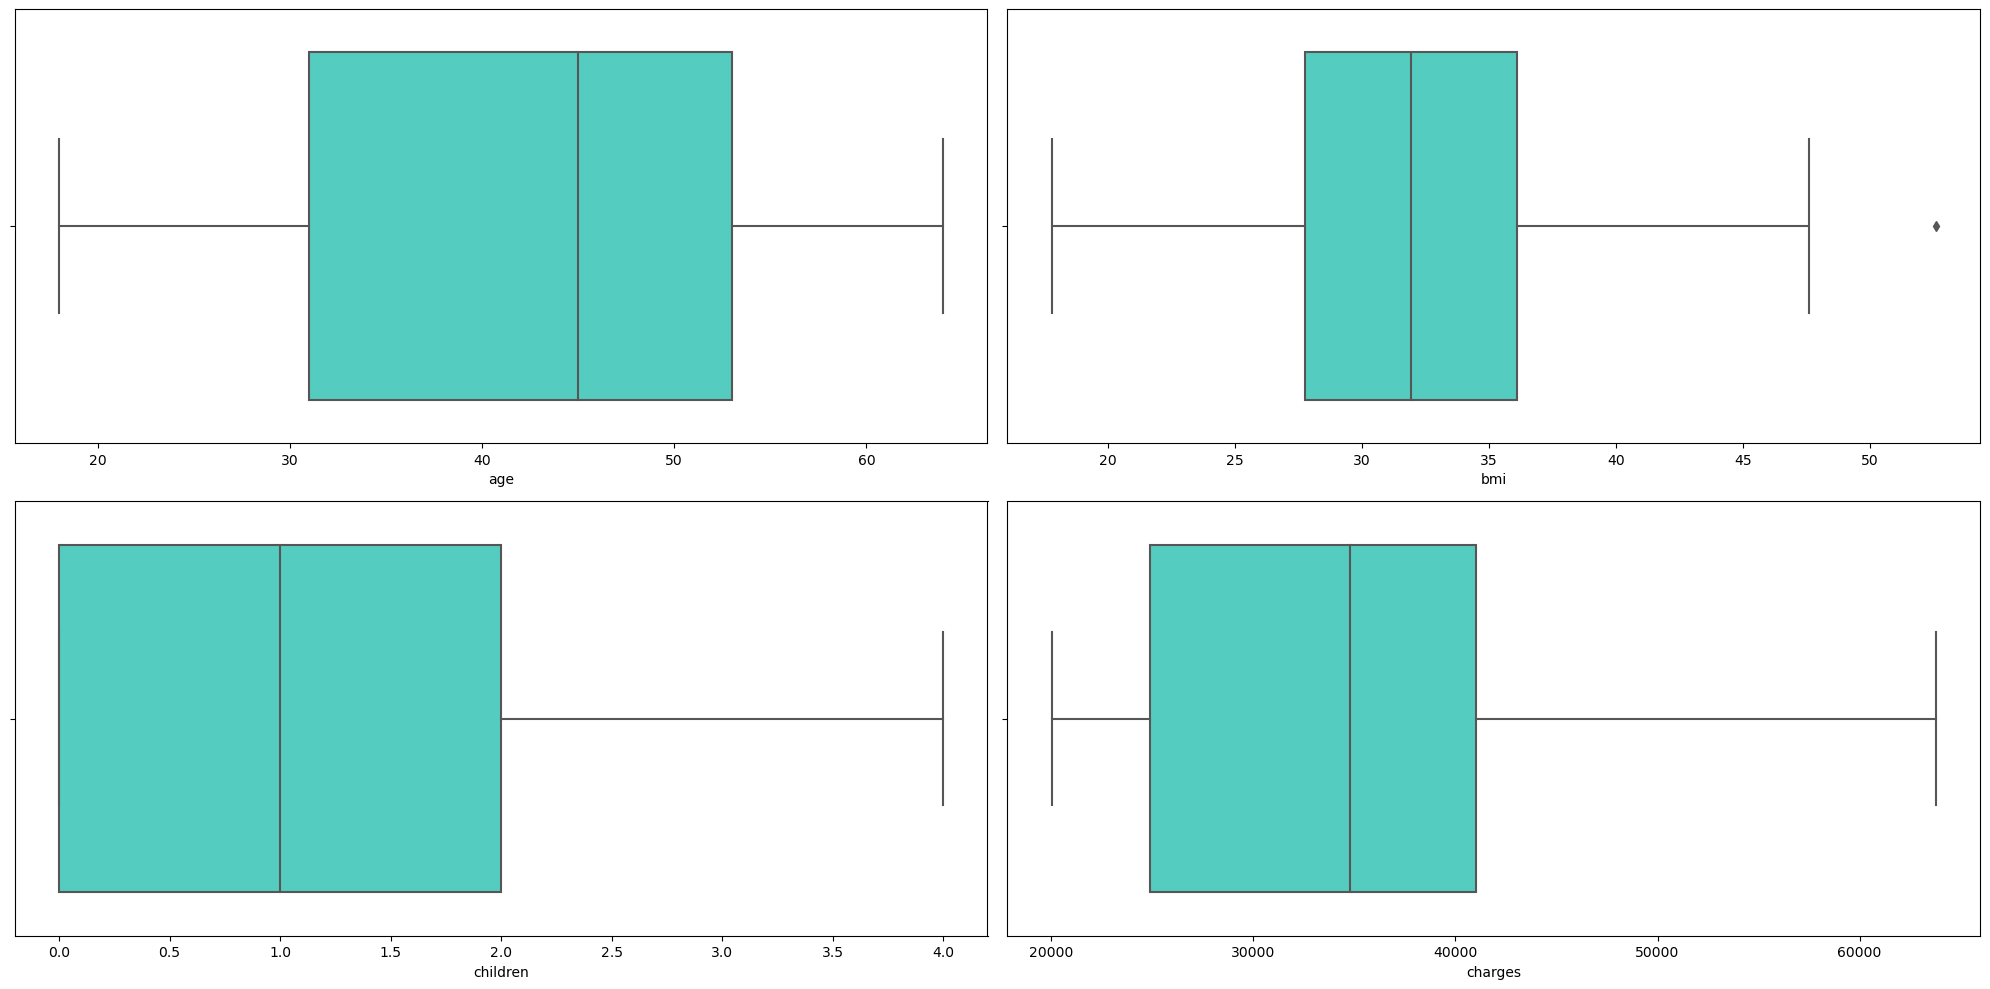

In [19]:
fig, axes = plt.subplots(2,2, figsize=(20,10))
axes = axes.flat
for indice, columna in enumerate(numericas4.columns):
    sns.boxplot(x = numericas4[columna], data = df4, ax=axes[indice], color = "turquoise"); # para trazar una línea de densidad   
plt.tight_layout()
plt.show();

In [20]:
df4.shape

(273, 7)

A parte de verlo visualmente vamos a comprobarlo analiticamente lso outliers

In [21]:
lista_columnas4 = list(numericas4.columns)#hacemos una lista con las columnas numericas para pasarsela a nuestra funcion.
ind4 = detectar_outliers(lista_columnas4, df4)

In [22]:
# en que columnas nos hemos encontrado con outliers? 
ind.keys()

dict_keys(['bmi', 'charges'])

Creamos un df solo con la columna bmi que es la que tiene los outliers

In [23]:
df_sin_charges= df4.drop('charges',axis=1)
df_sin_charges

,age,sex,bmi,children,smoker,region
3,33,male,22.705,0,no,northwest
9,60,female,25.840,0,no,northwest
11,62,female,26.290,0,yes,southeast
14,27,male,42.130,0,yes,southeast
19,30,male,35.300,0,yes,southwest
...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest
1321,62,male,26.695,0,yes,northeast
1323,42,female,40.370,2,yes,southeast
1328,23,female,24.225,2,no,northeast


In [24]:
# hacemos las variables numericas de este nuevo df
numericas5 = df_sin_charges.select_dtypes(np.number)
numericas5.head(2)

,age,bmi,children
3,33,22.705,0
9,60,25.840,0


In [25]:
#hacemos una lista con las columnas numericas para pasarsela a nuestra funcion
lista_columnas5 = list(numericas5.columns)
ind5 = detectar_outliers(lista_columnas5, df_sin_charges)

In [26]:
#vemos que columnas tienen outliers
ind5.keys()

dict_keys(['bmi'])

Ahora que tenemos solo nuestra columna con outlier que no es nuestra columna de variable de respuestra, tratamos los outliers.

In [27]:
# Iteramos por el diccionario que hemos creado con los índices de los outliers
for k, v in ind5.items():
    # Sacamos la mediana de cada columna numérica
    mediana = df_sin_charges[k].median()
    # iteramos por cada fila de la columna en la que hay outliers 
    # y convertimos ese valor en la mediana
    for i in v:
        df_sin_charges.loc[i,k] = mediana

In [28]:
df.head().reset_index()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [29]:
df_sin_charges.head().reset_index()

,index,age,sex,bmi,children,smoker,region
0,3,33,male,22.705,0,no,northwest
1,9,60,female,25.840,0,no,northwest
2,11,62,female,26.290,0,yes,southeast
3,14,27,male,42.130,0,yes,southeast
4,19,30,male,35.300,0,yes,southwest


In [30]:
df_sin_charges.head(2)

,age,sex,bmi,children,smoker,region
3,33,male,22.705,0,no,northwest
9,60,female,25.840,0,no,northwest


In [31]:
chargues = df['charges']

In [32]:
df_c = pd.DataFrame(chargues)
df_c.head(2)

,charges
0,16884.9240
1,1725.5523


In [33]:
df_final = df_sin_charges.join(df_c, how ='left')

In [34]:
df_final.head(2)

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
9,60,female,25.840,0,no,northwest,28923.13692


In [35]:
numericas_f=df_final.select_dtypes(include=np.number)
numericas_f.head(2)

,age,bmi,children,charges
3,33,22.705,0,21984.47061
9,60,25.840,0,28923.13692


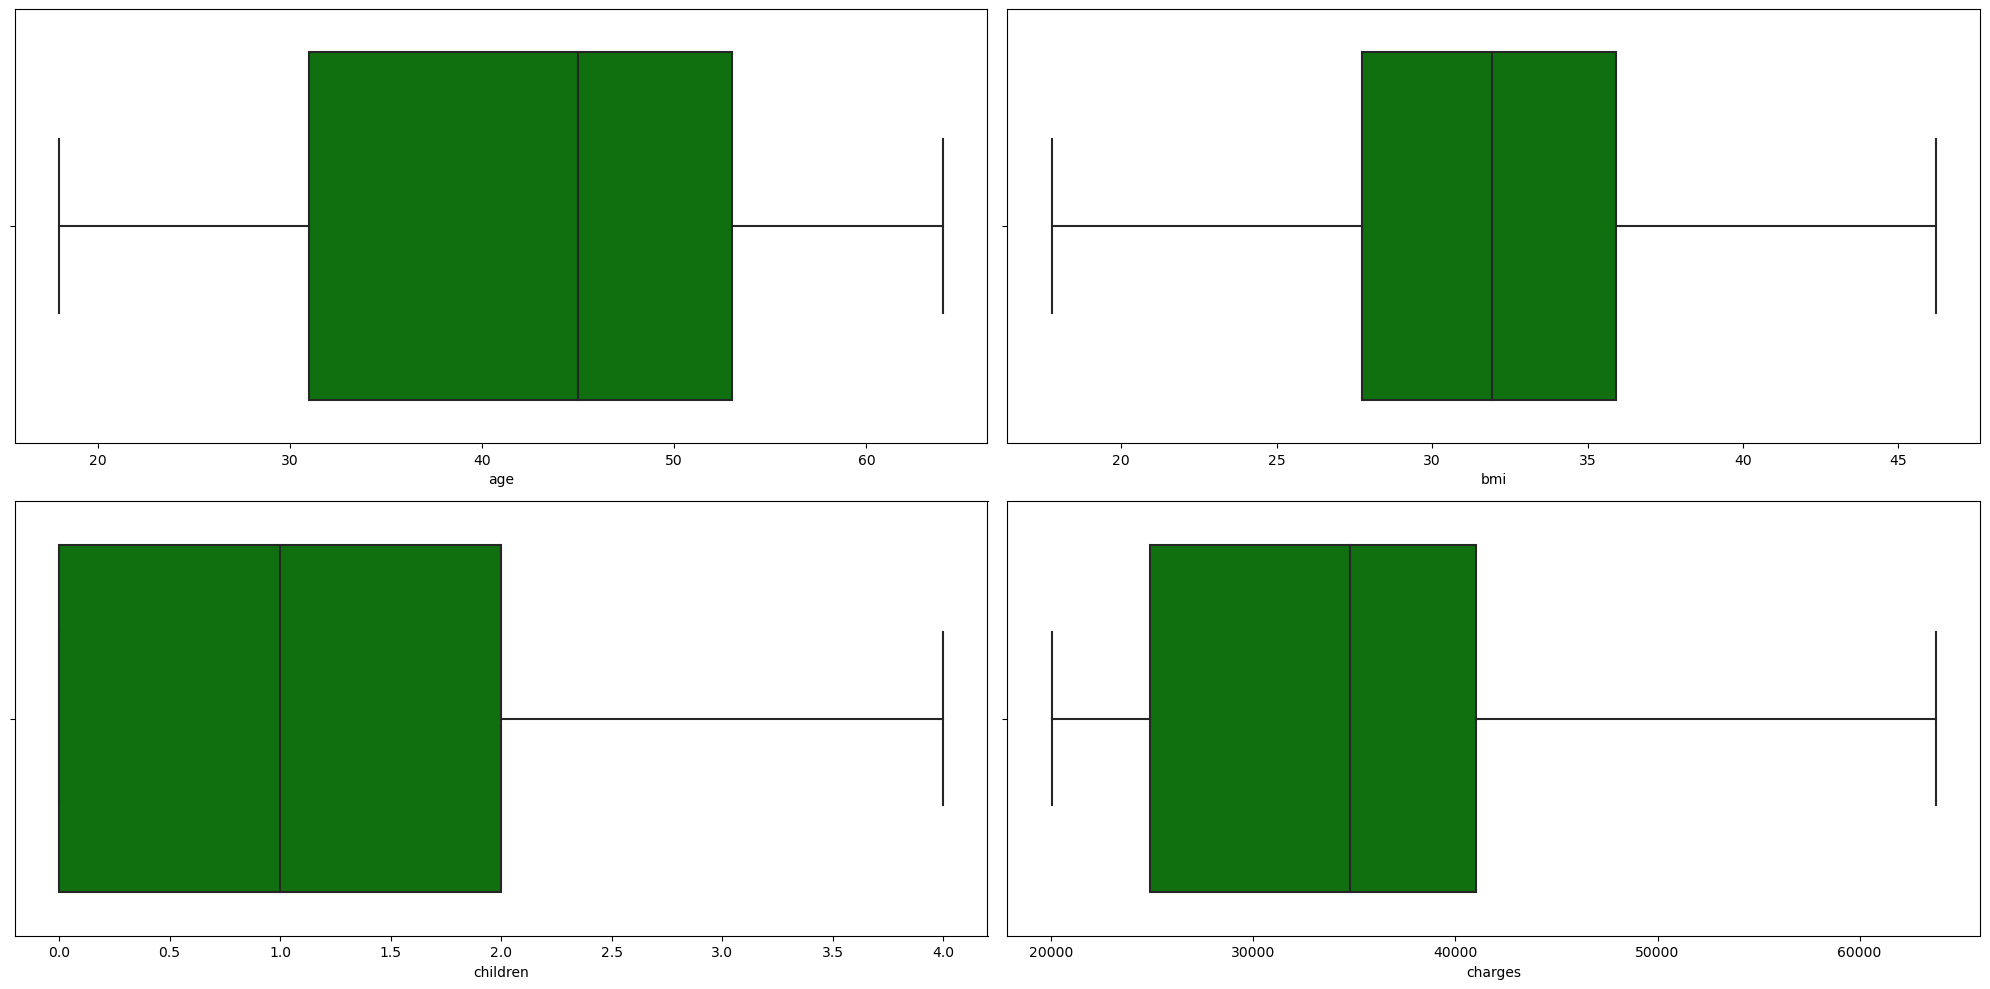

In [36]:
fig, axes = plt.subplots(2,2, figsize=(20,10))
axes = axes.flat
for indice, columna in enumerate(numericas_f.columns):
    sns.boxplot(x = numericas_f[columna], data = df, ax=axes[indice], color = "green"); # para trazar una línea de densidad   
plt.tight_layout()
plt.show();

## Analizar las relaciones entre las variables. 

### Variable respuesta

In [37]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


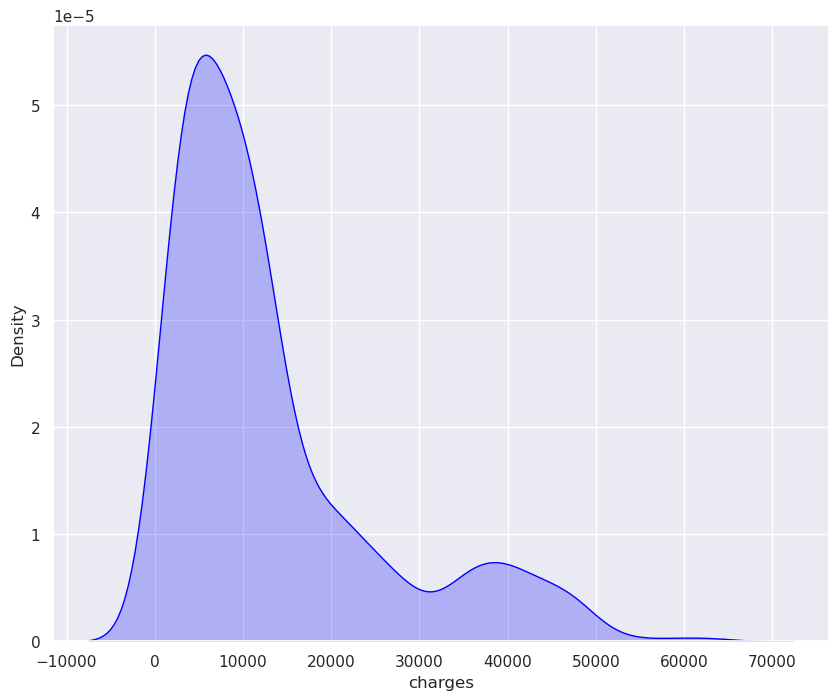

In [38]:
# vamos a ver visualmente como está distribuida la variable respuesta
sns.set(style="ticks")
sns.set_style("darkgrid")
sns.distplot(
    df["charges"], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});


### Variables predictoras

#### Variables numéricas

In [39]:
# exploramos cuáles son los principales estadísticos de las variables numéricas

df.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


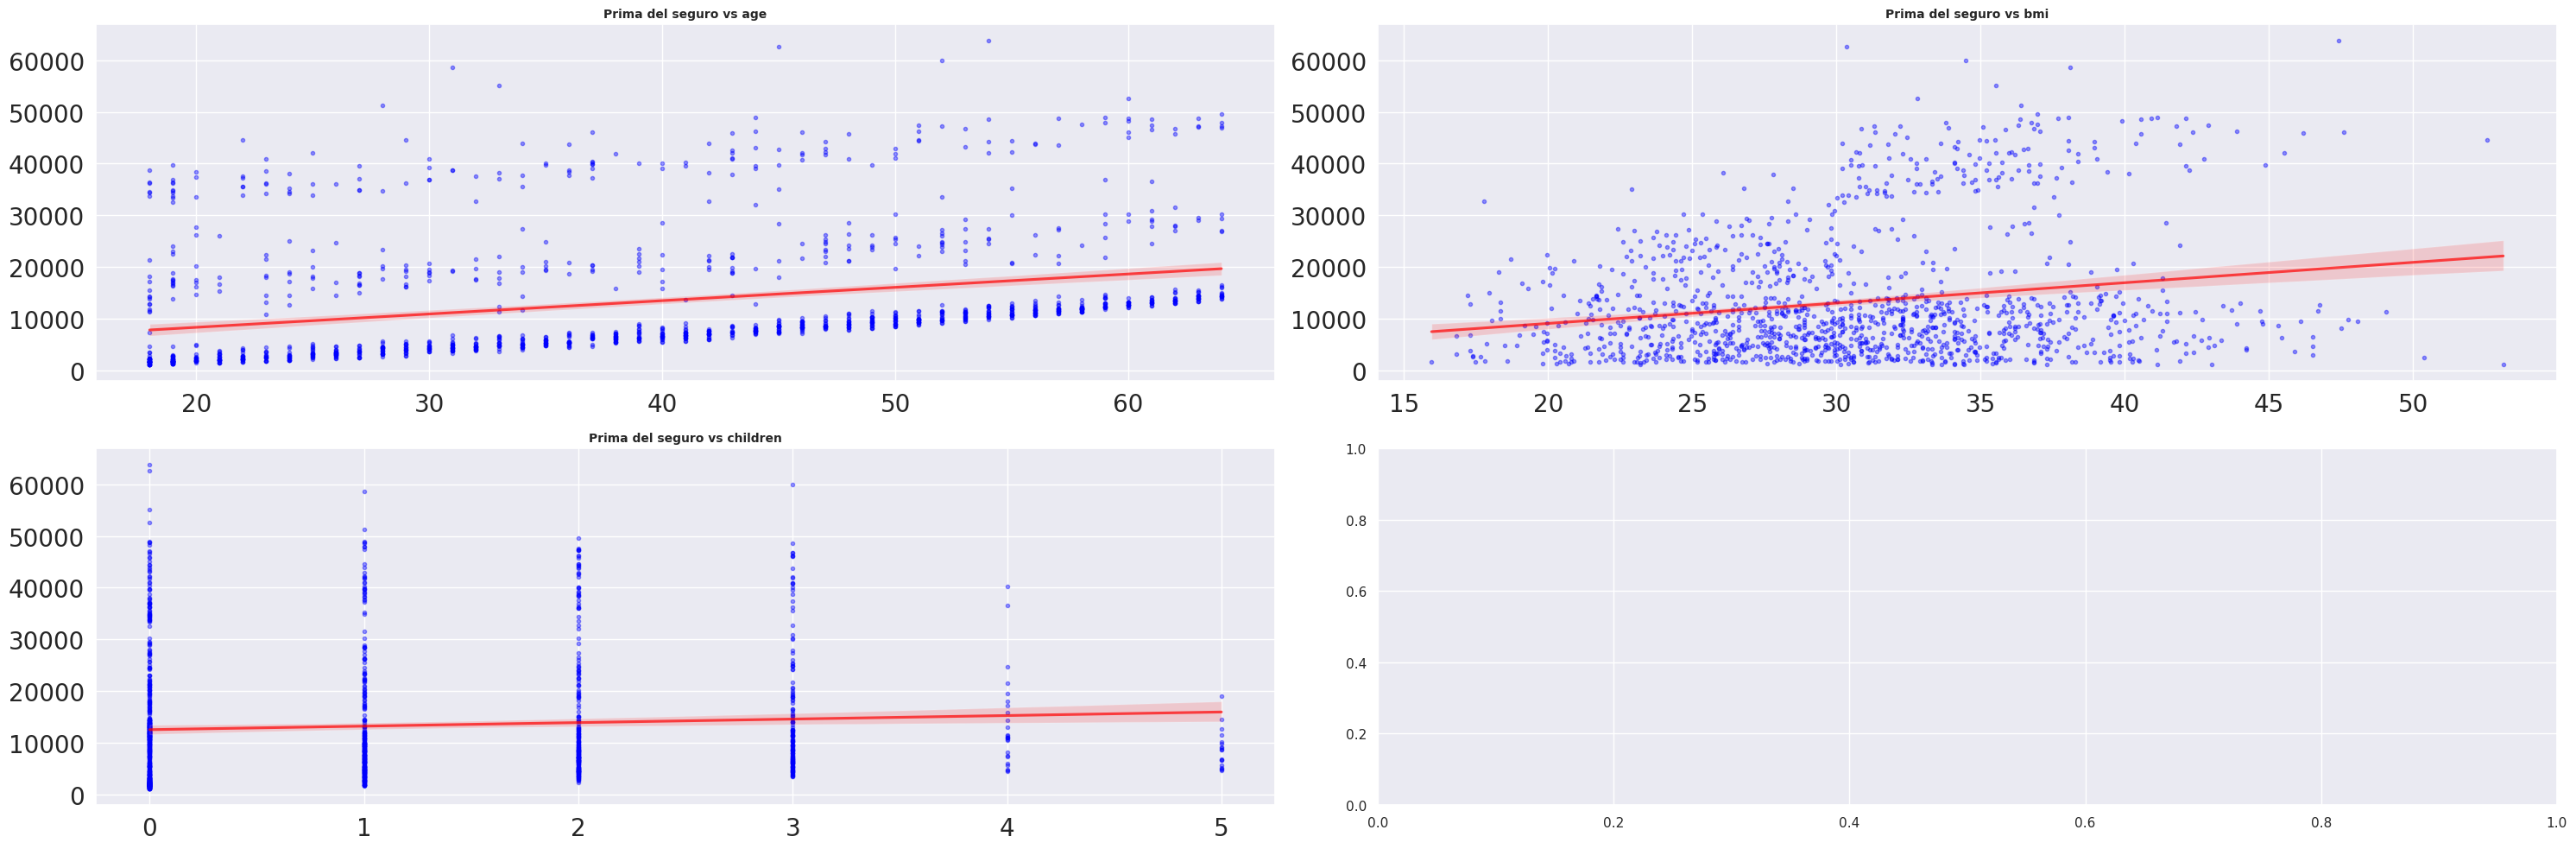

In [40]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# ==============================================================================


fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))


axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["charges"], 
        color = "blue", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Prima del seguro vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

#### Correlación entre variables numéricas

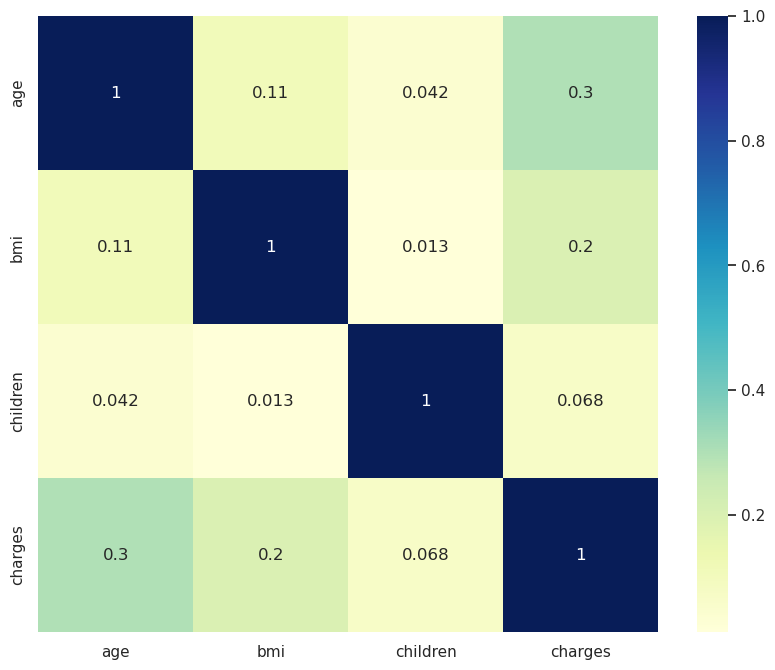

In [41]:
sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
           annot = True);

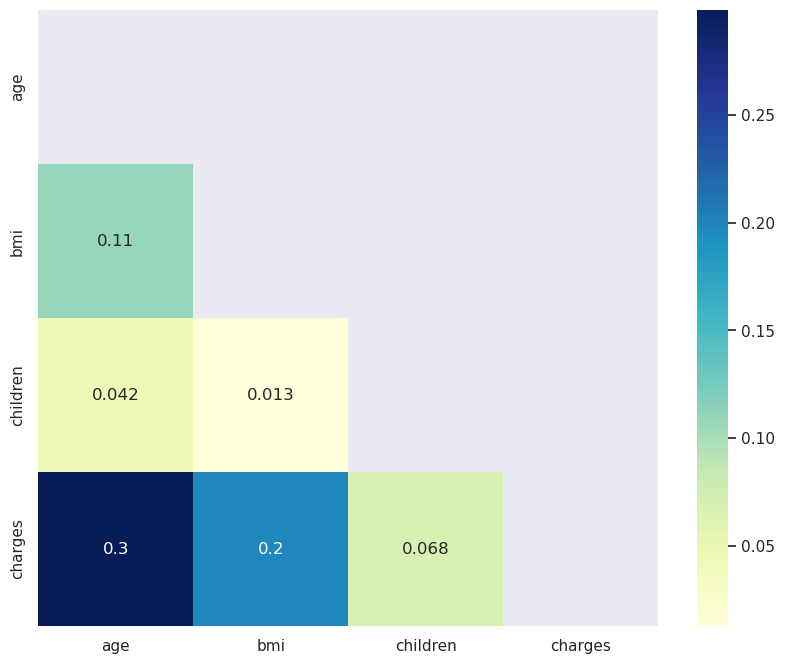

In [42]:
# creamos un dataframe todo de unos de la misma forma que nuestra matriz de correlación

mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))

sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True);

#### Variables categóricas

In [43]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [44]:
categoricas = df.select_dtypes(include = 'object').describe().T
categoricas.head()

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


# Region

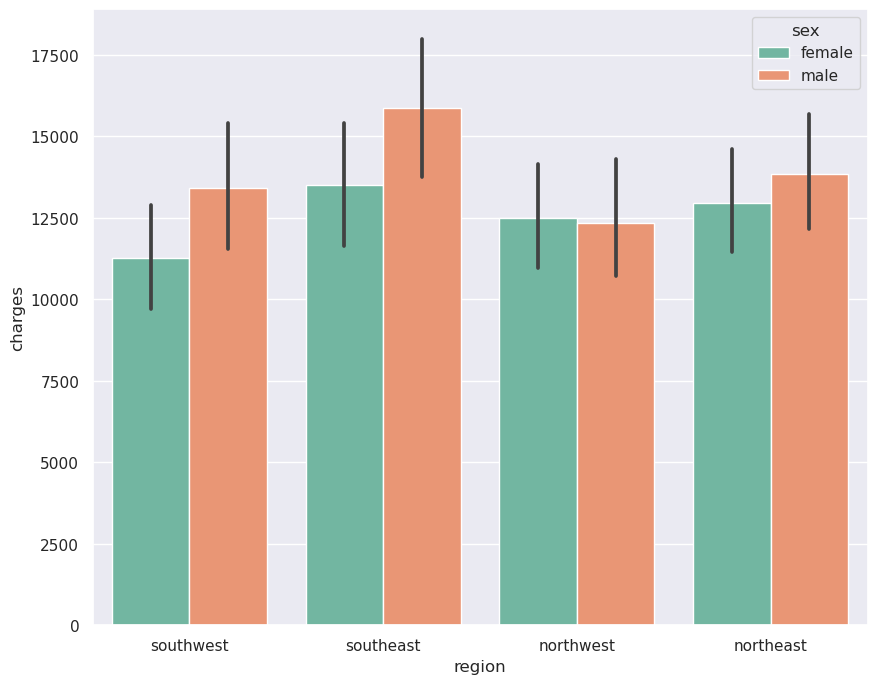

In [45]:
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='Set2');

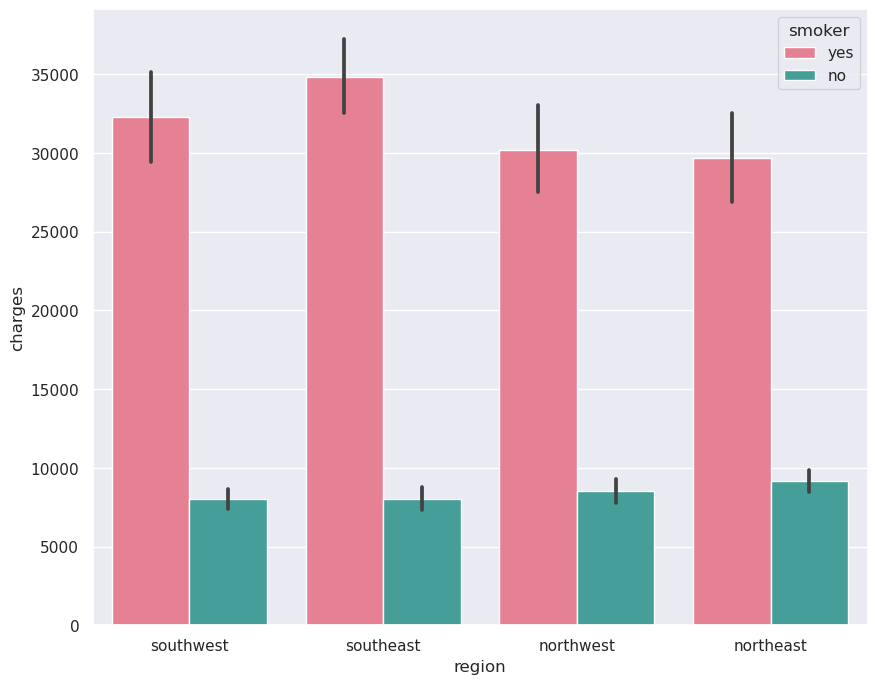

In [46]:
sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='husl');

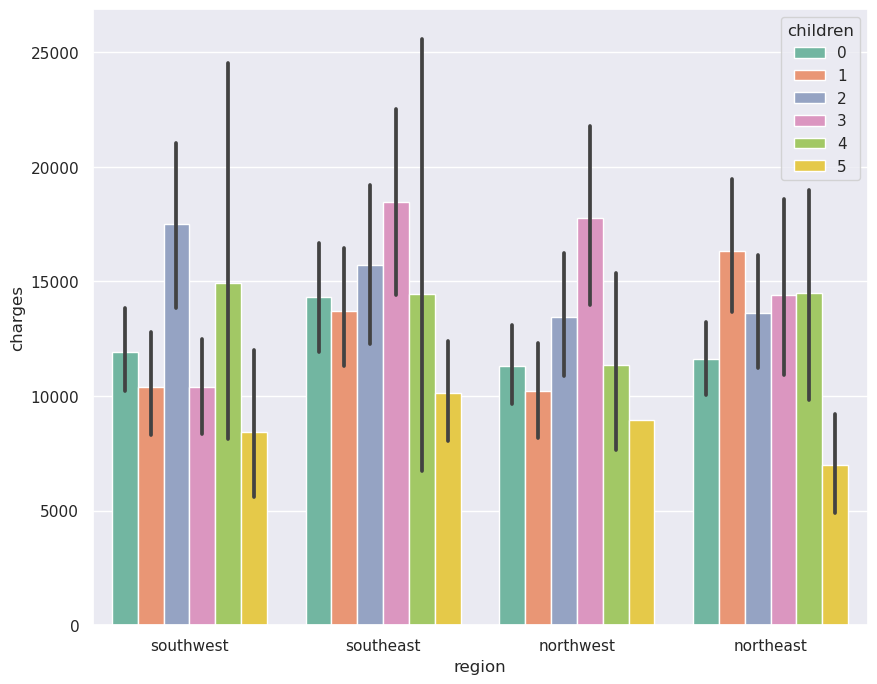

In [47]:
sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set2');

# Children

<AxesSubplot:xlabel='children', ylabel='charges'>

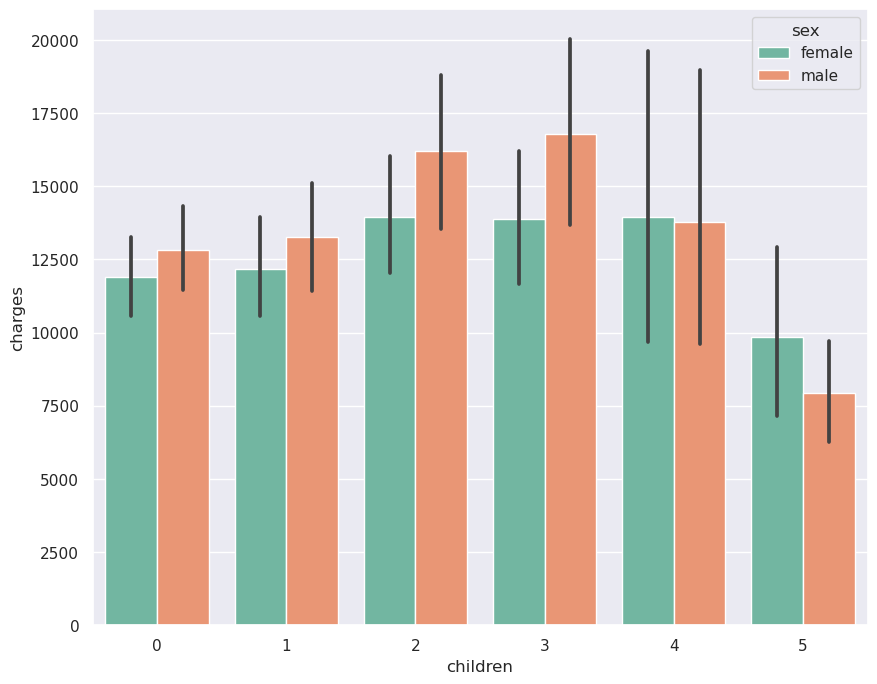

In [48]:
sns.barplot(x='children', y='charges', hue='sex', data=df, palette='Set2')

<AxesSubplot:xlabel='children', ylabel='charges'>

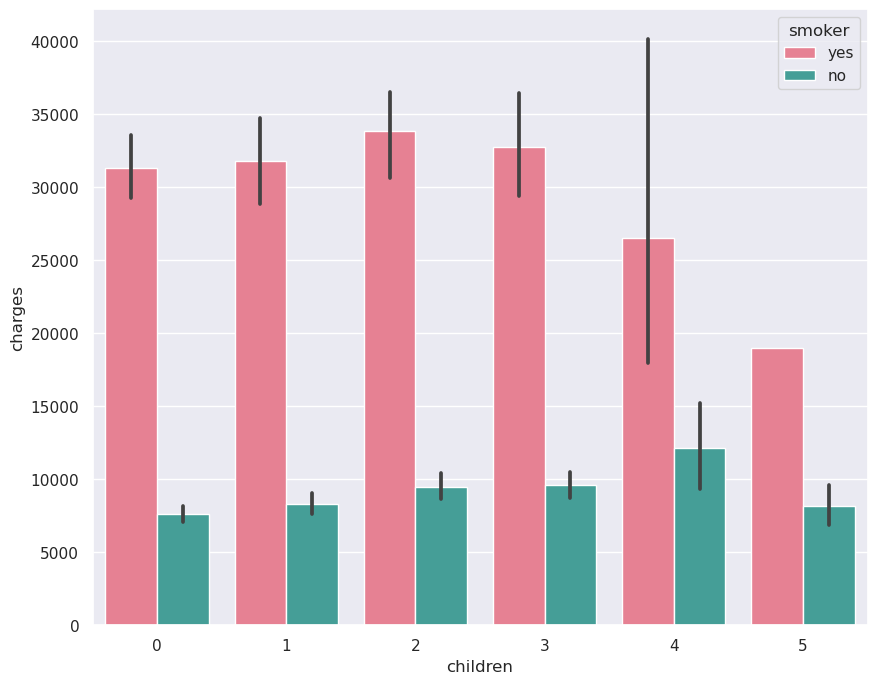

In [49]:
sns.barplot(x = 'children', y = 'charges',
                 hue='smoker', data=df, palette='husl')

<AxesSubplot:xlabel='children', ylabel='charges'>

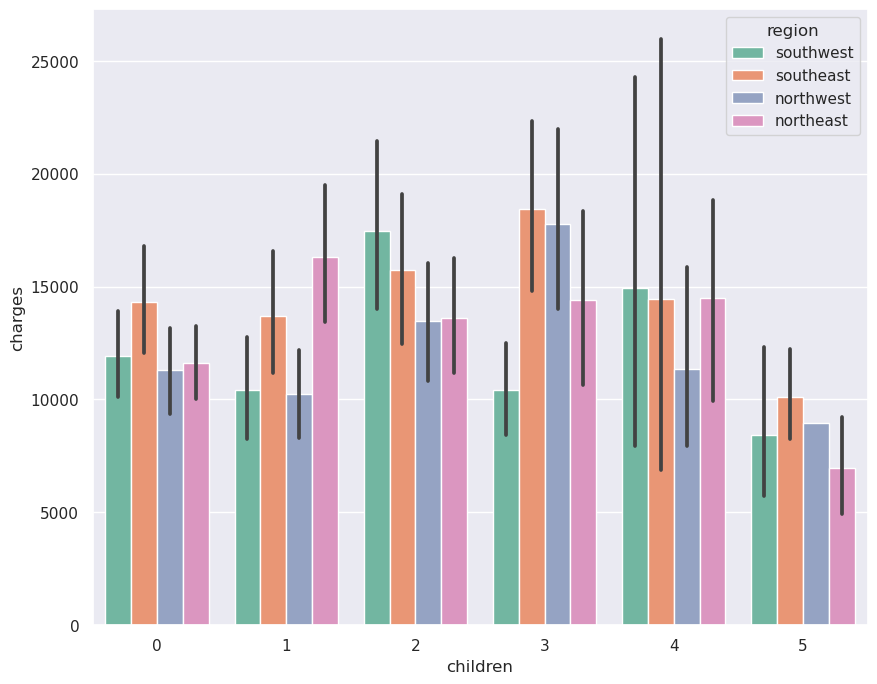

In [50]:
sns.barplot(x='children', y='charges', hue='region', data=df, palette='Set2')

# Smoker

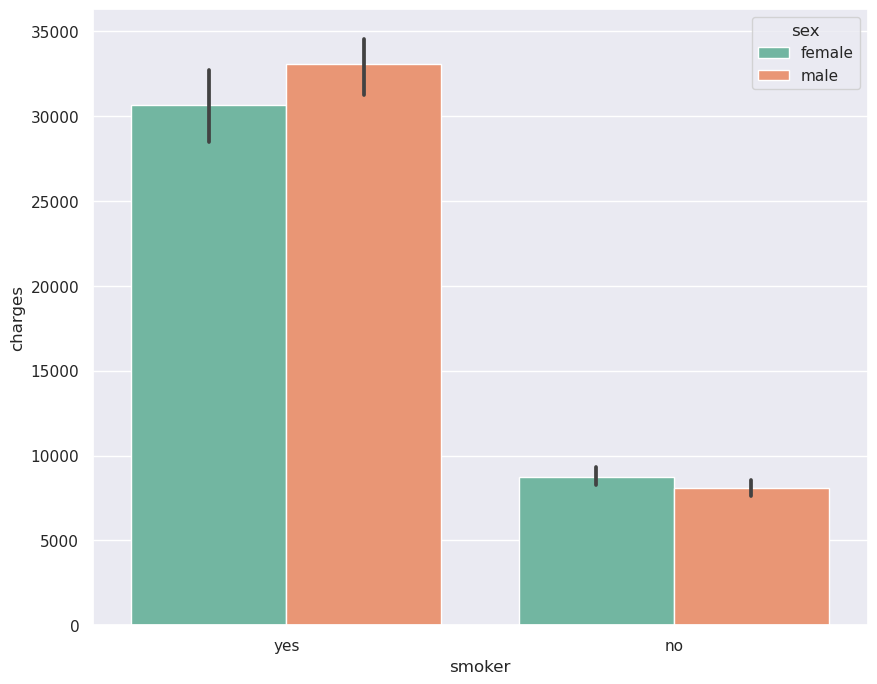

In [51]:
sns.barplot(x='smoker', y='charges', hue='sex', data=df, palette='Set2');

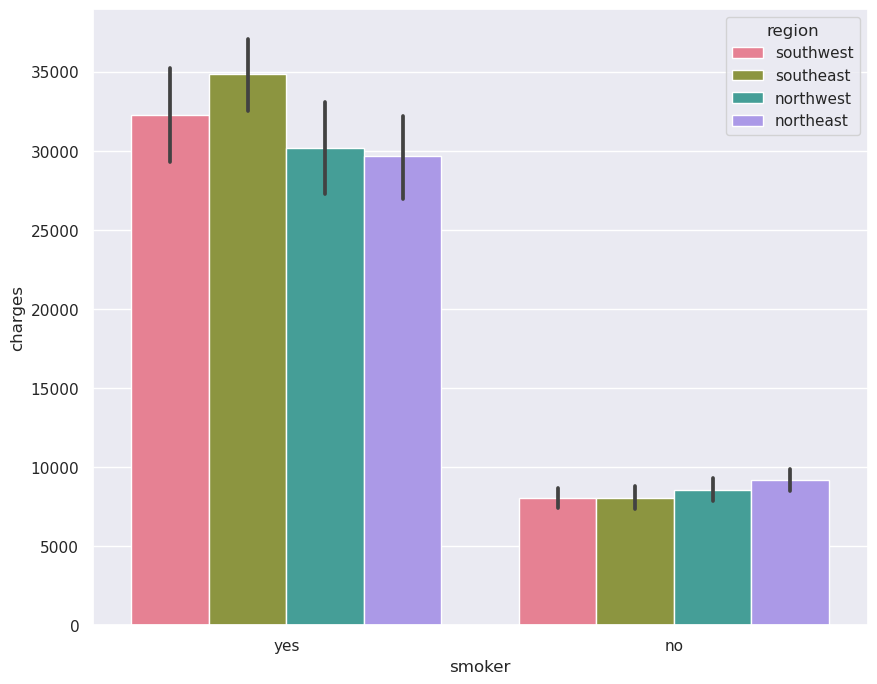

In [52]:
sns.barplot(x = 'smoker', y = 'charges',
                 hue='region', data=df, palette='husl');

<AxesSubplot:xlabel='smoker', ylabel='charges'>

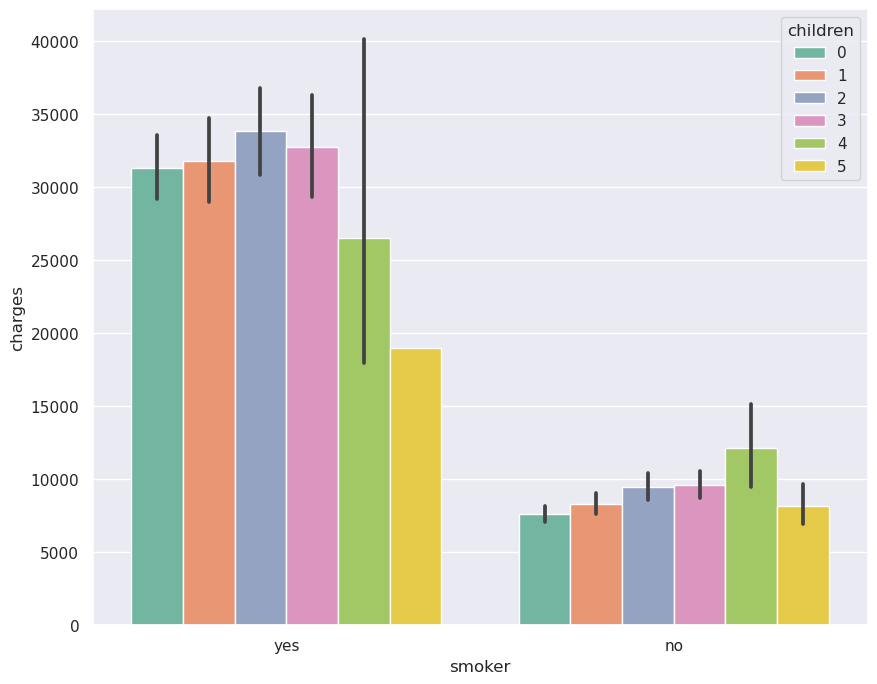

In [53]:
sns.barplot(x='smoker', y='charges', hue='children', data=df, palette='Set2')

In [54]:
df_final.to_csv('data/05-primas_limpio.csv')